<a href="https://colab.research.google.com/github/Nancytechie/Data-Science-/blob/main/AILab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 1 (AI Lab)**

*Apache web Server Log Analysis*

**1.IMPORTING ALL REQUIRED LIBRARIES**

In [ ]:
!pip install advertools


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.1/312.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 7.6 MB/s eta 0:00:00


In [ ]:
pip install ua-parser

In [ ]:
pip install squarify

In [ ]:
import advertools as adv
import pandas as pd
from ua_parser import user_agent_parser
import pyarrow.parquet as pq
import pyarrow
from ipywidgets import interact
import matplotlib.pyplot as plt
import ua_parser
pd.options.display.max_columns = None
import squarify

**2. Cleaning and then combined log file using adavance libarary known as Advertool**

In [ ]:
%%time
adv.logs_to_df(
    log_file='/log_file.log',
    output_file='output_file.parquet',
    errors_file='errors_file.txt',
    log_format='combined')

Parsed          24,484 lines.
CPU times: user 353 ms, sys: 84.8 ms, total: 438 ms
Wall time: 556 ms


**3.1 converting it into parquet form as the data is very large, this extension will make our work easy**

**3.2 correcting the format of our datetime, to standard format. **

In [ ]:
logs_df = pd.read_parquet('output_file.parquet')
logs_df['datetime'] = pd.to_datetime(logs_df['datetime'],
                                     format='%d/%b/%Y:%H:%M:%S %z')

In [ ]:
file_path = '/log_file.log'

with open(file_path, 'r') as file:
    row_count = sum(1 for _ in file)

print(f"Number of rows in the file: {row_count}")

Number of rows in the file: 91378


**4. Before, working in data we should get/ collect information about the data. This help us to get clear understanding of our data.**

In [ ]:
host_df = adv.reverse_dns_lookup(logs_df['client'])
host_df.head(5)

,ip_address,count,cum_count,perc,cum_perc,hostname,aliaslist,ipaddrlist,errors
0,91.139.164.207,831,831,0.033945,0.033945,91-139-164-207.sf.ddns.bulsat.com,,91.139.164.207,None
1,130.204.199.252,739,1570,0.030187,0.064131,602ad0cd481f.softphone.blizoo.bg,,130.204.199.252,None
2,212.39.89.155,717,2287,0.029288,0.093419,212-39-89-155.ip.btc-net.bg,,212.39.89.155,None
3,46.238.56.74,705,2992,0.028798,0.122217,ip-46-238-56-74.home.megalan.bg,,46.238.56.74,None
4,31.211.159.44,622,3614,0.025407,0.147625,None,None,None,[Errno 1] Unknown host


**5 Let's see our Top visitors and maximum frequency**

**Top Visitors: are those IP Addresses who have maximum frequency .**

**Max_frequency: are those website who has maximum traffic.**

In [ ]:
#Calculate the top visitors by counting unique client IP addresses
top_visitors = logs_df['client'].value_counts().head(10)

# Calculate the frequency of requests by counting the occurrences of each request
frequency_of_requests = logs_df['request'].value_counts().head(10)

print("Top Visitors:")
print(top_visitors)

print("\nFrequency of Requests:")
print(frequency_of_requests)

Top Visitors:
91.139.164.207     831
130.204.199.252    739
212.39.89.155      717
46.238.56.74       705
31.211.159.44      622
109.107.88.160     607
149.62.204.185     551
94.155.244.5       548
176.12.22.61       486
46.10.120.188      462
Name: client, dtype: int64

Frequency of Requests:
/wp-content/uploads/2021/05/HLGN-Logo.png                               335
/?wc-ajax=get_refreshed_fragments                                       305
/wp-admin/admin-ajax.php                                                265
/                                                                       224
/?nitroWebhook=cache_ready&token=fdccd0f43d6699b0ad7852228297d999       110
/category/nargileta/                                                     92
/wp-includes/js/jquery/ui/core.min.js?ver=1.13.1                         76
/wp-includes/js/jquery/ui/menu.min.js?ver=1.13.1                         75
/wp-content/plugins/woocommerce-econt/inc/css/colorbox.css?ver=5.9.1     75
/wp-includes/js/jquer

**We have seen top 10 top visitors and max_frequency request site.**

**Now, lets visualise it. But we will keep our number a little small, for now its 50. otherwise, it will be difficult to see the changes**

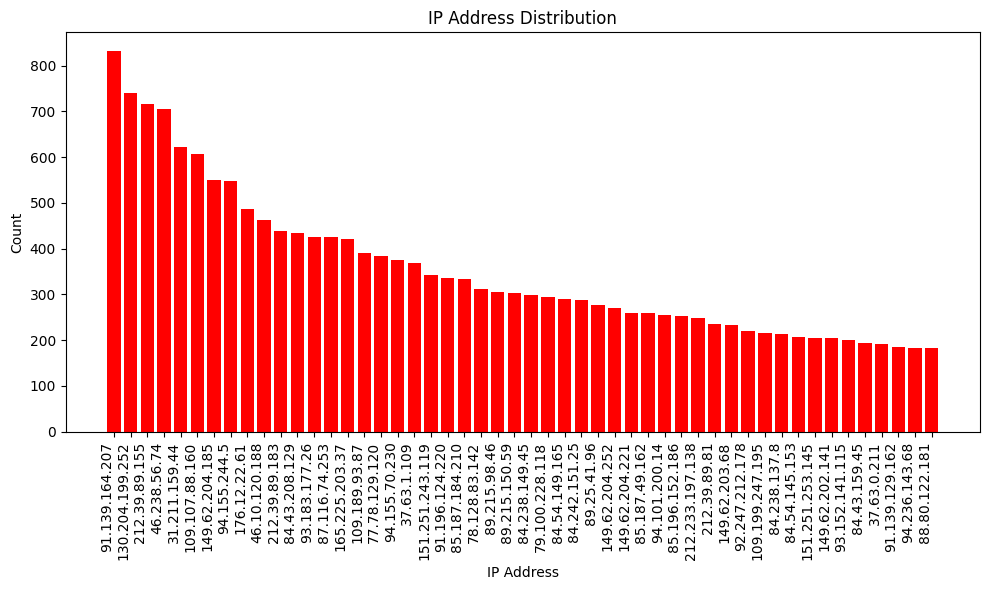

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(host_df['ip_address'].head(50), host_df['count'].head(50), color='red')
plt.xlabel('IP Address')
plt.ylabel('Count')
plt.title('IP Address Distribution')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

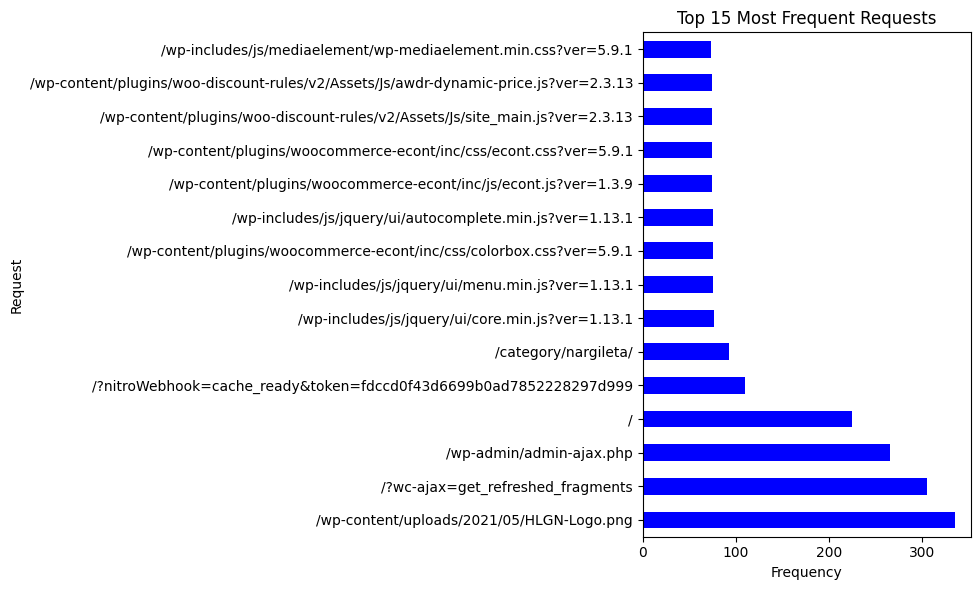

In [ ]:
# Calculate the frequency of requests by counting the occurrences of each request
frequency_of_requests = logs_df['request'].value_counts().head(15)
# Plot the data using a bar plot
plt.figure(figsize=(10, 6))
frequency_of_requests.plot(kind='barh', color='blue')
plt.ylabel('Request')
plt.xlabel('Frequency')
plt.title('Top 15 Most Frequent Requests')
plt.tight_layout()
plt.show()

**6. Now, let's move a little further and take a look into our status column.**

  status  count
0    200  22929
1    206      4
2    301    112
3    302     23
4    304    847
5    401      3
6    403      3
7    404    482
8    406     24
9    500     54


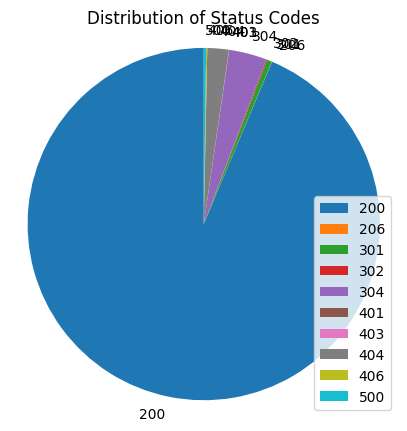

In [ ]:
status_df = logs_df.groupby('status').size().reset_index(name='count')
print(status_df)
# Plot the data using a pie chart
plt.figure(figsize=(5, 5))
plt.pie(status_df['count'], radius=0.8,labels=status_df['status'],startangle=90,autopct='')
plt.title('Distribution of Status Codes')
plt.axis('equal')
plt.legend(loc='lower right')
plt.show()

In [ ]:
pip install user-agents

In [ ]:
from user_agents import parse
import matplotlib.pyplot as plt

**By just looking our pie chart we can say,200 has cover 90% or more and that's a good news as well because 200 indicate that the request is successful, hence causing less trouble.**

**7. The date and time,is one of the important data as it helps us track records and update it time to time.Therfore, lets work on date time data now.**

**First. we'll look the number of IP Address by hour then by week**

            client  hour  request_count
0   104.143.83.241    13              6
1  104.196.137.185    14              1
2  104.196.146.182    12              1
3    104.196.48.73    12              1
4    104.196.48.73    14              1
            client  day_of_week  request_count
0   104.143.83.241            0              6
1  104.196.137.185            0              1
2  104.196.146.182            0              1
3    104.196.48.73            0              2
4    104.196.61.31            0              1


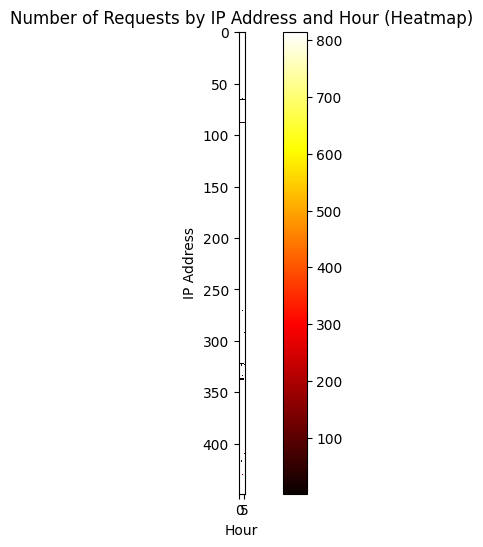

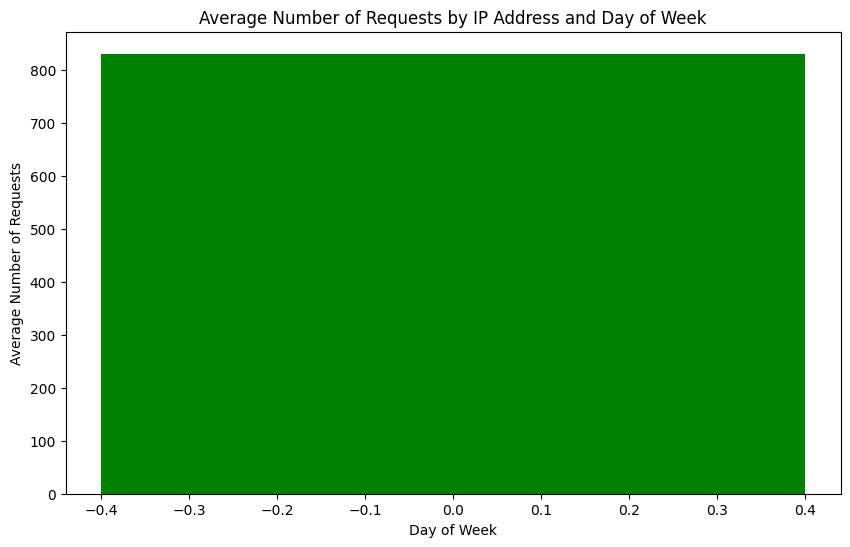

In [ ]:

logs_df['datetime'] = pd.to_datetime(logs_df['datetime'])

# Extract hour and day of the week from the "datetime" column
logs_df['hour'] = logs_df['datetime'].dt.hour
logs_df['day_of_week'] = logs_df['datetime'].dt.dayofweek

# Group by IP address and hour, and calculate the count of requests
ip_hourly_counts = logs_df.groupby(['client', 'hour'])['hour'].count().reset_index(name='request_count')

# Group by IP address and day of the week, and calculate the average request count
ip_weekly_avg = logs_df.groupby(['client', 'day_of_week'])['day_of_week'].count().reset_index(name='request_count')

print(ip_hourly_counts.head(5))
print(ip_weekly_avg.head(5))

# Convert the "datetime" column to datetime data type, setting utc=True
logs_df['datetime'] = pd.to_datetime(logs_df['datetime'], utc=True)

# Extract hour and day of the week from the "datetime" column
logs_df['hour'] = logs_df['datetime'].dt.hour
logs_df['day_of_week'] = logs_df['datetime'].dt.dayofweek

# Group by IP address and hour, and calculate the count of requests
ip_hourly_counts = logs_df.groupby(['client', 'hour'])['hour'].count().reset_index(name='request_count')

# Create the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(ip_hourly_counts.pivot_table(index='client', columns='hour', values='request_count', aggfunc=sum), cmap='hot')

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('IP Address')
plt.title('Number of Requests by IP Address and Hour (Heatmap)')
plt.colorbar()

# Group by IP address and day of the week, and calculate the average request count
ip_weekly_avg = logs_df.groupby(['client', 'day_of_week'])['day_of_week'].count().reset_index(name='request_count')

# Visualize the weekly average request counts
plt.figure(figsize=(10, 6))
plt.bar(ip_weekly_avg['day_of_week'], ip_weekly_avg['request_count'], color='green')

# Add labels and title
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Requests')
plt.title('Average Number of Requests by IP Address and Day of Week')

# Show the plots
plt.show()

**8. It's time explore our url and browers. It helps to understand the maximum user's platform and operatinf system, using which we can come up with so many conclusions.**

   browser  total_hits
0   Chrome       12803
5   Safari        5330
4    Other        3935
3    Opera        1190
2  Firefox         710
1     Edge         513


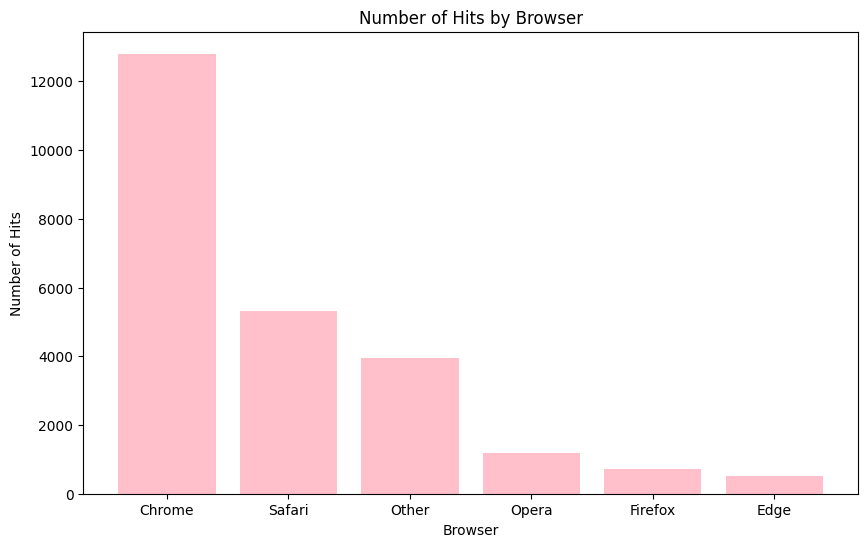

In [ ]:
import matplotlib.pyplot as plt
# Parse user agents using the user-agents library
def extract_browser(user_agent):
    ua = parse(user_agent)
    browser_family = ua.browser.family.lower()

    if 'chrome' in browser_family:
        return 'Chrome'
    elif 'firefox' in browser_family:
        return 'Firefox'
    elif 'safari' in browser_family:
        return 'Safari'
    elif 'edge' in browser_family:
        return 'Edge'
    elif 'opera' in browser_family:
        return 'Opera'
    elif 'brave' in browser_family:
        return 'Brave'
    elif 'internet explorer' in browser_family or 'msie' in browser_family:
        return 'Internet Explorer'
    else:
        return 'Other'

logs_df['browser'] = logs_df['user_agent'].apply(extract_browser)

# Group data by browser and count hits
browser_hits = logs_df.groupby('browser').size().reset_index(name='total_hits')

# Sort by total hits
browser_hits = browser_hits.sort_values(by=['total_hits'], ascending=False)
print(browser_hits)
# Create a bar chart of the number of hits for each browser
plt.figure(figsize=(10, 6))
plt.bar(browser_hits['browser'], browser_hits['total_hits'], color = 'pink')

# Add labels and title
plt.xlabel('Browser')
plt.ylabel('Number of Hits')
plt.title('Number of Hits by Browser')

# Show the plot
plt.show()

By above we can clearly see, that maximum user are using chrome.

**9. We have came so far, explored lot of data but it's not finished yet. now it's time to more advance visulisation.**

First: Number of hits in a site by hour

Second: Number of total hits by hour

site  Unknown  com.google.android.googlequicksearchbox  \
hour                                                     
17       45.0                                      1.0   
16      261.0                                      NaN   
15      150.0                                      NaN   
14      258.0                                      NaN   
13      133.0                                      NaN   

site  cpcalendars.nargile.bg  cpcontacts.nargile.bg  l.instagram.com  \
hour                                                                   
17                       NaN                    NaN              1.0   
16                       NaN                    NaN             20.0   
15                       NaN                    NaN              NaN   
14                       NaN                    NaN              NaN   
13                       1.0                    1.0              NaN   

site  m.abv.bg  m.facebook.com  mail.nargile.bg  myactivity.google.com  \
hour          

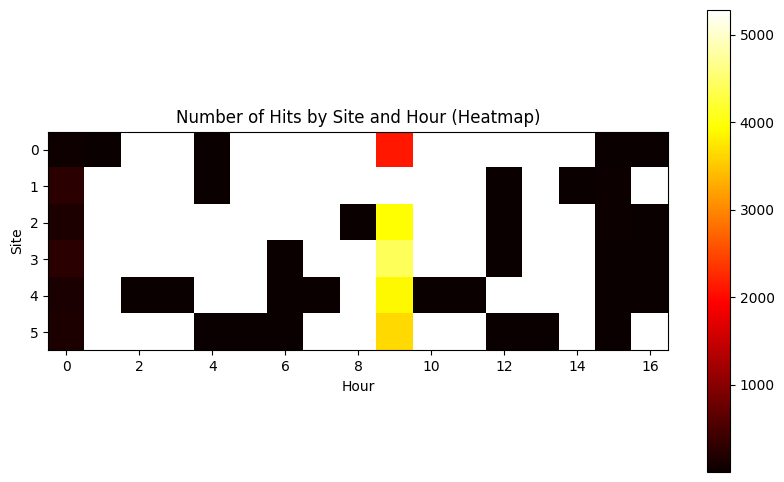

In [ ]:
# Parse the referer using the function defined above
def extract_site(referer):
    if pd.isna(referer):
        return 'Direct'
    else:
        referer_parts = referer.split('/')
        if len(referer_parts) >= 3:
            return referer_parts[2]
        else:
            return 'Unknown'

logs_df['site'] = logs_df['referer'].apply(extract_site)

# Group data by site and hour and count hits
site_hourly_hits = logs_df.groupby(['site', 'hour']).size().reset_index(name='hits')

# Pivot the table for site distribution per hour
site_hourly_pivot = site_hourly_hits.pivot(index='hour', columns='site', values='hits')

# Sort by total hits for each hour
site_hourly_pivot = site_hourly_pivot.sort_values(by=['hour'], ascending=False)
print(site_hourly_pivot.head(5))
# Create a heatmap of the number of hits for each site and hour
plt.figure(figsize=(10, 6))
plt.imshow(site_hourly_pivot, cmap='hot')

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Site')
plt.title('Number of Hits by Site and Hour (Heatmap)')
plt.colorbar()
plt.show()

   hour  total_hits
0    12        3832
1    13        4045
2    14        4698
3    15        4123
4    16        5606
5    17        2177


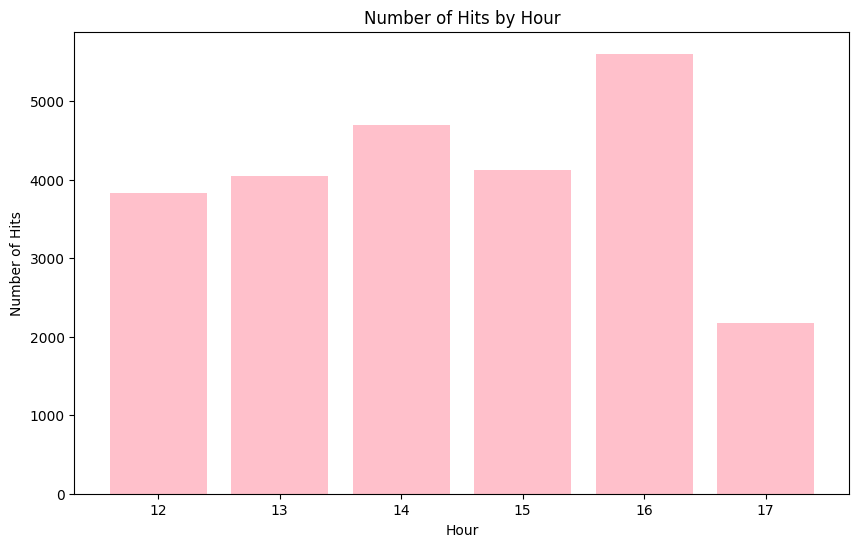

In [ ]:
# Group data by hour and count hits
hourly_hits = logs_df.groupby('hour').size().reset_index(name='total_hits')
print(hourly_hits)
# Sort by total hits
#hourly_hits = hourly_hits.sort_values(by=['total_hits'], ascending=False)

# Create a bar chart of the number of hits for each hour
plt.figure(figsize=(10, 6))
plt.bar(hourly_hits['hour'], hourly_hits['total_hits'],color='pink')

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Number of Hits')
plt.title('Number of Hits by Hour')

# Show the plot
plt.show()

**10.lets see together the operating system and device type together**

In [ ]:
%%time
ua_df = pd.json_normalize([user_agent_parser.Parse(ua) for ua in logs_df['user_agent']])
ua_df.columns = 'ua_' + ua_df.columns.str.replace('user_agent\.', '', regex=True)

CPU times: user 380 ms, sys: 14.4 ms, total: 394 ms
Wall time: 400 ms


In [ ]:
# Create a new dataframe that only contains the `ua_family` and `ua_os.family` columns
browser_os_df = ua_df[['ua_family', 'ua_os.family']]
# Count the number of occurrences of each browser and operating system combination
browser_os_counts = browser_os_df.groupby(['ua_family', 'ua_os.family']).size().reset_index(name='count')
print(browser_os_counts.head(10))

               ua_family ua_os.family  count
0              AhrefsBot        Other      9
1                 Chrome      Android     22
2                 Chrome     Mac OS X    418
3                 Chrome      Windows   4718
4          Chrome Mobile      Android   6306
5  Chrome Mobile WebView      Android    553
6      Chrome Mobile iOS          iOS    786
7                   Edge      Windows    513
8               Facebook      Android    184
9               Facebook          iOS    239


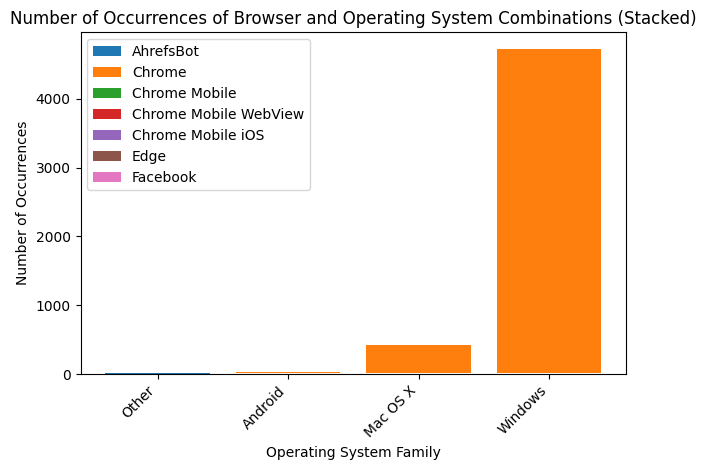

In [ ]:
df = browser_os_counts.head(10)

# Get unique browser names for legend
browser_names = df['ua_family'].unique()

# Initialize the bottom for stacking
bottom = None

# Create a stacked bar chart
for browser_name in browser_names:
    browser_data = df[df['ua_family'] == browser_name]
    plt.bar(browser_data['ua_os.family'], browser_data['count'], label=browser_name, bottom=bottom)
    if bottom is None:
        bottom = browser_data['count']
    else:
        bottom += browser_data['count']

# Add labels and title
plt.xlabel('Operating System Family')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences of Browser and Operating System Combinations (Stacked)')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()